In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

##  Load and split data into train and test part

In [2]:
(train_feature,train_labels),(test_feature,test_labels)=keras.datasets.mnist.load_data()

In [3]:
len(train_feature)

60000

In [4]:
len(train_labels)

60000

In [5]:
len(test_feature)

10000

In [6]:
len(test_labels)

10000

In [7]:
train_feature[0].shape

(28, 28)

In [8]:
#train_feature[0]

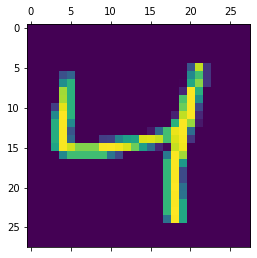

In [9]:
plt.matshow(train_feature[2])

In [10]:
train_labels[2]

4

In [11]:
train_labels[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

## Feature scalling

In [12]:
train_feature=train_feature/255
test_feature=test_feature/255

In [13]:
train_feature.shape

(60000, 28, 28)

In [14]:
#After feature scalling
#train_feature[0]

In [15]:
train_feature_flattened=train_feature.reshape(len(train_feature),28*28)
test_feature_flattened=test_feature.reshape(len(test_feature),28*28)

In [16]:
train_feature_flattened.shape

(60000, 784)

In [17]:
test_feature_flattened.shape

(10000, 784)

In [18]:
#train_feature_flattened[0]
# One-D array

## Building model 

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_feature_flattened,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.7265 - accuracy: 0.8095
Epoch 2/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.3126 - accuracy: 0.9138
Epoch 3/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.2812 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.2690 - accuracy: 0.9242
Epoch 5/5
1803/1875 [===========================>..] - ETA: 0s - loss: 0.2681 - accuracy: 0.9255

In [ ]:
model.evaluate(test_feature_flattened,test_labels)

In [ ]:
predicted_labels=model.predict(test_feature_flattened)

In [ ]:
plt.matshow(test_feature[2])

In [ ]:
predicted_labels[2]

In [ ]:
np.argmax(predicted_labels[2])

In [ ]:
predicted_labels=[np.argmax(i) for i in predicted_labels]

In [ ]:
predicted_labels[:5]

In [ ]:
test_labels[:5]

## Confusion Matrix for analizing acuracy

In [ ]:
cm=tf.math.confusion_matrix(labels=test_labels, predictions=predicted_labels)
cm

In [ ]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,  annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add Hidden Layer

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_feature_flattened,train_labels,epochs=5)

In [ ]:
model.evaluate(test_feature_flattened,test_labels)

In [ ]:
predicted_labels=model.predict(test_feature_flattened)
predicted_labels=[np.argmax(i) for i in predicted_labels]
cm=tf.math.confusion_matrix(labels=test_labels, predictions=predicted_labels)

In [ ]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm,  annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## If you dont want flattened seprately so you can flattened feature inside the building model 

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_feature,train_labels,epochs=5)